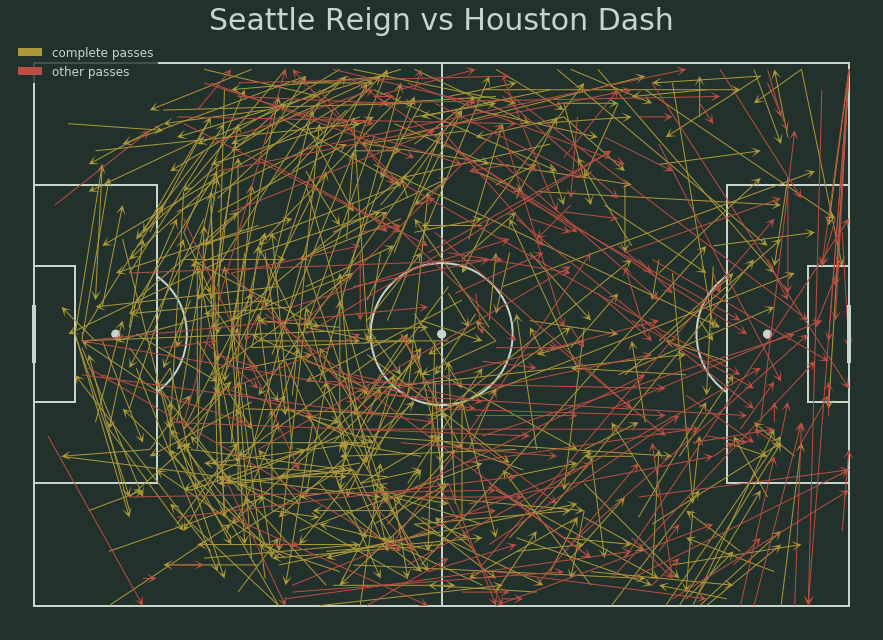

In [1]:
from mplsoccer.pitch import Pitch
from mplsoccer.statsbomb import read_event, EVENT_SLUG
from matplotlib import rcParams
import os

rcParams['text.color'] = '#c7d5cc' # set the default text color

# get event dataframe for game 7478, create a dataframe of the passes, and a boolean mask for the outcome
df_dict = read_event(os.path.join(EVENT_SLUG,'7478.json'),
                     related_event_df = False, shot_freeze_frame_df = False, tactics_lineup_df = False)
df = df_dict['event'] # read_event returns a dictionary of dataframes
mask_pass_seattle = (df.type_name == 'Pass') & (df.team_name == 'Seattle Reign')
df_pass = df.loc[mask_pass_seattle, ['x','y','pass_end_x','pass_end_y','outcome_name']]
mask_complete = df_pass.outcome_name.isnull()

# Plot arrows
pitch = Pitch(pitch_type = 'statsbomb', orientation = 'horizontal', tight_layout = True,
              pitch_color = '#22312b', line_color = '#c7d5cc', figsize = (16, 9))
fig, ax = pitch.draw()
pitch.quiver(df_pass[mask_complete].x, df_pass[mask_complete].y,
             df_pass[mask_complete].pass_end_x, df_pass[mask_complete].pass_end_y, width = 1,
             headwidth = 10, headlength = 10, color = '#ad993c', ax = ax, label = 'complete passes')
pitch.quiver(df_pass[~mask_complete].x, df_pass[~mask_complete].y,
             df_pass[~mask_complete].pass_end_x, df_pass[~mask_complete].pass_end_y, width = 1, 
             headwidth = 10, headlength = 10, color = '#ba4f45', ax = ax, label = 'other passes')
ax.legend(facecolor = '#22312b', edgecolor = 'None', fontsize = 'large')
team1, team2 = df.team_name.unique()
ax.set_title(f'{team1} vs {team2}', fontsize = 30);
fig.set_facecolor('#22312b')
fig.set_constrained_layout(False)
fig.savefig(os.path.join('figures','README_arrows_example.png'), facecolor = '#22312b', bbox_inches = 'tight')